<a href="https://colab.research.google.com/github/kishore779/kishore779/blob/main/Iris_Classification_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Iris Dataset Head ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

--- Iris Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   spe

<Figure size 1000x800 with 0 Axes>

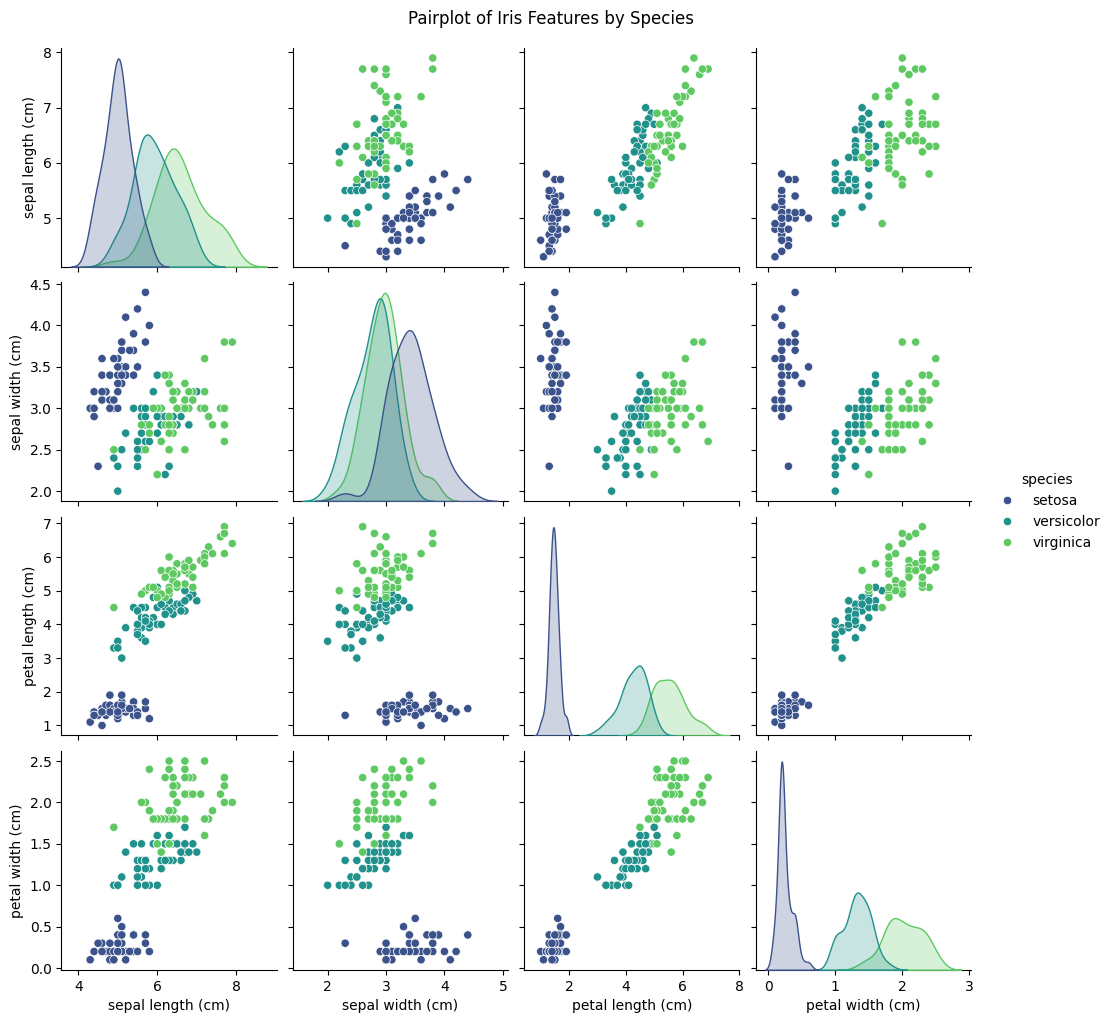

/tmp/ipython-input-4-4238468378.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette='viridis')
/tmp/ipython-input-4-4238468378.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette='viridis')
/tmp/ipython-input-4-4238468378.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette='viridis')
/tmp/ipython-input-4-4238468378.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

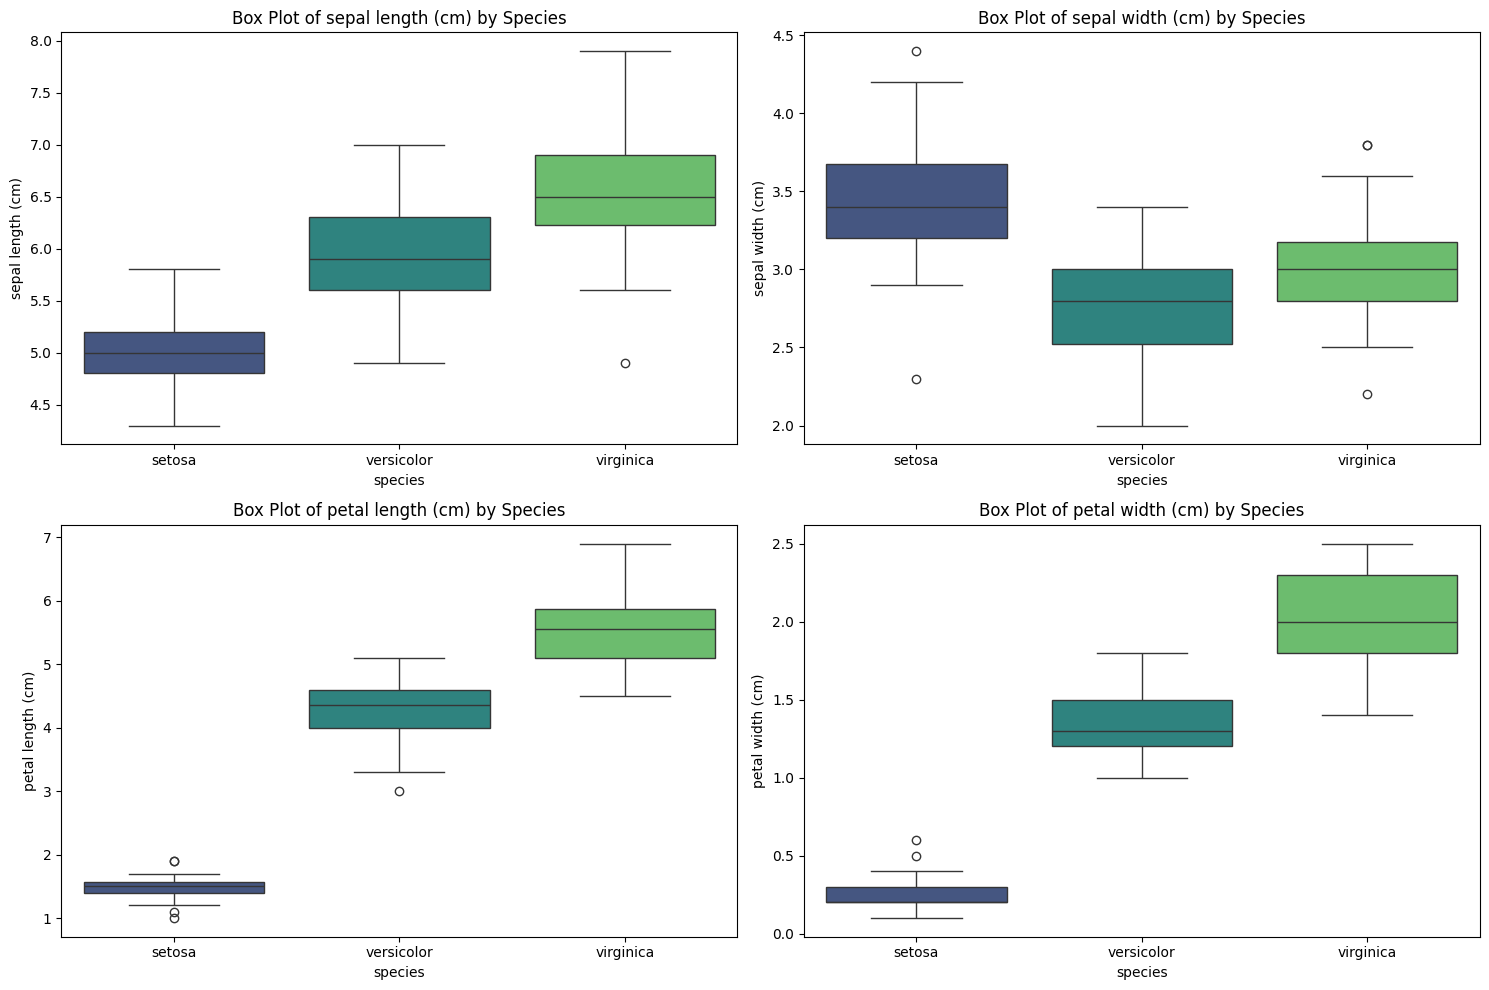


Training set size: 120 samples
Testing set size: 30 samples

--- Scaled Training Data Sample (first 5 rows) ---
[[-1.72156775 -0.33210111 -1.34572231 -1.32327558]
 [-1.12449223 -1.22765467  0.41450518  0.6517626 ]
 [ 1.14439475 -0.5559895   0.58484978  0.25675496]
 [-1.12449223  0.11567567 -1.28894078 -1.45494479]
 [-0.40800161 -1.22765467  0.13059752  0.12508575]]

Training the KNN model...
Model training complete.

--- Model Evaluation Results ---
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


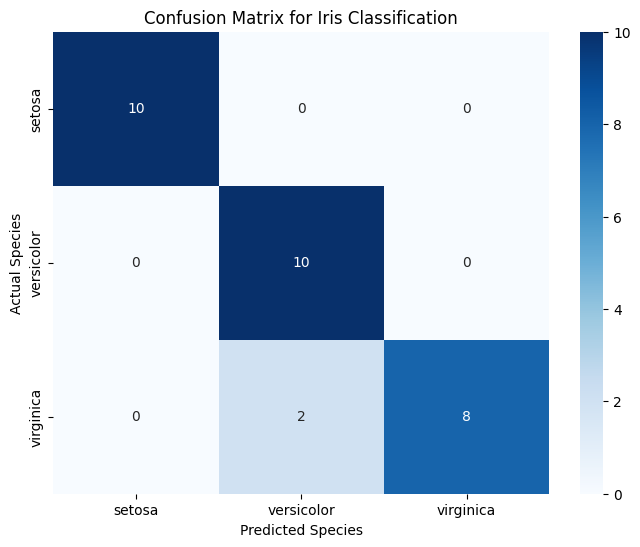


New flower measurements: [5.1, 3.5, 1.4, 0.2]
Predicted species: setosa

New flower measurements: [5.1, 3.5, 1.4, 0.2]
Predicted species: setosa


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Dataset
# The Iris dataset is a classic and is available directly from scikit-learn.
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species: 0=setosa, 1=versicolor, 2=virginica)

# Create a DataFrame for easier viewing and initial EDA
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

print("--- Iris Dataset Head ---")
print(df.head())
print("\n--- Iris Dataset Info ---")
df.info()
print("\n--- Iris Dataset Description ---")
print(df.describe())
print("\n--- Iris Species Distribution ---")
print(df['species'].value_counts())

# 2. Exploratory Data Analysis (EDA) - Visualizations
# Pairplot to visualize relationships between features colored by species
# This helps to see how well the species are separated by the features.
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()

# Box plots to visualize feature distributions per species
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=df, palette='viridis')
    plt.title(f'Box Plot of {feature} by Species')
plt.tight_layout()
plt.show()


# 3. Data Preprocessing
# Splitting the dataset into training and testing sets
# We'll use 80% of the data for training and 20% for testing.
# `random_state` ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y ensures that the proportion of species in the train and test sets is similar to the original dataset.

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Feature Scaling
# Standardize features by removing the mean and scaling to unit variance.
# This is important for distance-based algorithms like KNN.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit on training data and transform it
X_test_scaled = scaler.transform(X_test)     # Transform test data using the *same* scaler

print("\n--- Scaled Training Data Sample (first 5 rows) ---")
print(X_train_scaled[:5])

# 4. Model Selection and Training
# Initialize the K-Nearest Neighbors classifier
# We'll start with k=5 (considering 5 nearest neighbors).
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the scaled training data
print("\nTraining the KNN model...")
knn.fit(X_train_scaled, y_train)
print("Model training complete.")

# 5. Model Evaluation
# Predict the species for the test set
y_pred = knn.predict(X_test_scaled)

print("\n--- Model Evaluation Results ---")

# Calculate Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate Classification Report
# This provides precision, recall, f1-score, and support for each class.
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Generate Confusion Matrix
# This shows the number of correct and incorrect predictions for each class.
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.title('Confusion Matrix for Iris Classification')
plt.show()

# 6. Making a Prediction on New Data (Example)
# Let's simulate a new Iris flower measurement
# (sepal_length, sepal_width, petal_length, petal_width)
new_flower_measurements = [[5.1, 3.5, 1.4, 0.2]] # Example: similar to Iris setosa

# Scale the new data using the *same* scaler fitted on the training data
new_flower_scaled = scaler.transform(new_flower_measurements)

# Predict the species
predicted_species_index = knn.predict(new_flower_scaled)[0]
predicted_species_name = iris.target_names[predicted_species_index]

print(f"\nNew flower measurements: {new_flower_measurements[0]}")
print(f"Predicted species: {predicted_species_name}")

# Another example: similar to Iris versicolor
new_flower_measurements_2 = [[6.0, 2.7, 4.5, 1.3]]
new_flower_scaled_2 = scaler.transform(new_flower_measurements_2)
predicted_species_index_2 = knn.predict(new_flower_scaled_2)[0]
predicted_species_name_2 = iris.target_names[predicted_species_index_2]

print(f"\nNew flower measurements: {new_flower_measurements_2[0]}")
print(f"Predicted species: {predicted_species_name_2}")